In [2]:
import pickle
import numpy as np
import os,sys
import matplotlib.pyplot as plt 

In [3]:
path_discoveri = "/Users/francescomassimo/Codes/Optimization_on_cluster/Discoveri"
sys.path.insert(0, path_discoveri)

import Discoveri class

In [4]:
optimization_method                     = "Bayesian Optimization" 
# This example shows the use of a Bayesian Optimization
# with a function which has  multiple peaks

## Parameter space to explore

In [5]:
number_of_dimensions               = 1 
search_interval                    = [[0.,10.]]
input_parameters_names             = ["dim0"]

In [12]:
number_of_samples_per_iteration    = 1

## Optimization parameters

In [6]:
number_of_iterations               = 30

## Diagnostic and output dump periodicity

In [7]:
iterations_between_outputs         = 1

In [8]:
## Flag used to set if a numpy function or simulation results are optimized:
## if True it optimizes (i.e. maximizes) a numpy function defined in test_function
## Otherwise, it will postprocess simulation results using the function defined in simulation_postprocessing_function
## In both cases it is absolutely necessary that the function to optimize gives a number, different from inf,-inf and from nan
use_test_function                  = True

In [9]:
test_function                      = None
simulation_postprocessing_function = None

In [10]:
def my_test_function(x): # maximum near (4.5,4.5)
    return np.sum( -np.cos(x)-np.sin(x)-5/2.*np.cos(2.*x)+1/2.*np.sin(2.*x)  )
    
test_function                      = my_test_function

# Optimization of the test function

In [13]:
from discoveriMain import createOptimizationRun

starting_directory = os.getcwd()

# initialize an optimization run 
# the optimizer hyperparameters will be the default ones
optimization_run   = createOptimizationRun(starting_directory              = starting_directory,               \
                                           optimization_method             = optimization_method,              \
                                           number_of_samples_per_iteration = number_of_samples_per_iteration,  \
                                           number_of_dimensions            = number_of_dimensions,             \
                                           search_interval                 = search_interval,                  \
                                           number_of_iterations            = number_of_iterations,             \
                                           use_test_function               = use_test_function,                \
                                           test_function                   = test_function,                    \
                                           iterations_between_outputs      = iterations_between_outputs,       \
                                           input_parameters_names          = input_parameters_names )
    
# execute optimization run
optimization_run.execute()
    
    
# Save the optimization_run object to a file
with open('optimization_run.pkl', 'wb') as file:
    pickle.dump(optimization_run, file)
        
        
# You can load the file later
with open('optimization_run.pkl', 'rb') as file:
    loaded_optimization_run = pickle.load(file)
        

    
       

                                                                                  
           _____    _                                              _              
          |  __ \  (_)                                            (_)             
          | |  | |  _   ___    ___    ___   __   __   ___   _ __   _              
          | |  | | | | / __|  / __|  / _ \  \ \ / /  / _ \ | '__| | |             
          | |__| | | | \__ \ | (__  | (_) |  \ V /  |  __/ | |    | |             
          |_____/  |_| |___/  \___|  \___/    \_/    \___| |_|    |_|             
                                                                                  
           Data-driven Investigation through Simulations on Clusters              
  for the Optimization of the physical Variables' Effects in Regimes of Interest  
                                                                                  
                                                                                  

 In


# Optimum value    found by the Bayesian Optimization =  3.6787309091361715

# Optimum position found by the Bayesian Optimization =  [4.5369156]



# Optimum value    found by the Bayesian Optimization =  3.6787309091361715

# Optimum position found by the Bayesian Optimization =  [4.5369156]

=== Sample 0

=== optimum position found by sample  0  until now:  [4.5369156]

=== optimum function value found by sample  0  until now:  3.6787309091361715




 Iteration: 16 / 30

 Total time lapsed from the start of the optimization =  0.4466679096221924  s




 ---> Sample 0 Position: [0.05733251]  --> function value at this iteration =  -3.482034005067783

# Optimum value    found by the Bayesian Optimization =  3.6787309091361715

# Optimum position found by the Bayesian Optimization =  [4.5369156]



# Optimum value    found by the Bayesian Optimization =  3.6787309091361715

# Optimum position found by the Bayesian Optimization =  [4.5369156]

=== Sample 0

=== optimum position found b

/opt/homebrew/lib/python3.10/site-packages/sklearn/gaussian_process/_gpr.py:616: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)


# Visualize the surrogate model of bayesian optimization

<Figure size 640x480 with 0 Axes>

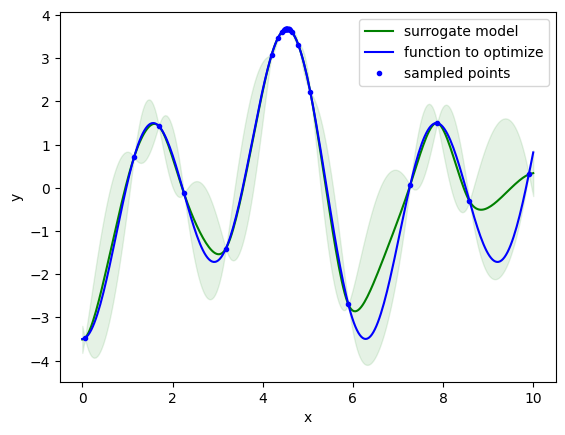

In [14]:
n_grid_points = 300
x_mesh        = np.linspace(loaded_optimization_run.optimizer.search_interval[0][0],loaded_optimization_run.optimizer.search_interval[0][1],num=n_grid_points)

# array for the predicted function values
function_value_mesh = np.zeros(n_grid_points)
# array for the uncertainity of the prediction as standard deviation
std = np.zeros(n_grid_points)
for i in range(0,n_grid_points):
    # remember that the surrogate model inside the optimizer takes for each dimension idim the coordinates
    # of the sample normalized by search_interval_size[idim], i.e. the size of the search interval in that dimension
    sample = (np.array([x_mesh[i]/loaded_optimization_run.optimizer.search_interval_size[0]])).reshape(1,1)
    # predict the value of the function with a surrogate model
    function_value_mesh[i],std[i] = loaded_optimization_run.optimizer.model.predict(sample,return_std=True)
           
            
# Plot

plt.figure();plt.ion();plt.show()
# plot the predicted values
plt.plot(x_mesh,function_value_mesh,"g",label="surrogate model")
# plot also the uncertainity of the prediction at each point
plt.fill_between(x_mesh,function_value_mesh-3*std,function_value_mesh+3*std,color="g",alpha=0.1)
# print the real value of the function to optimize (which is unknown to the optimizer)
plt.plot(x_mesh,[my_test_function(x) for x in x_mesh],"-b",label="function to optimize")
# print the points sampled by the optimizer, remembering to the normalize the X points
plt.plot(loaded_optimization_run.optimizer.X*loaded_optimization_run.optimizer.search_interval_size[0],loaded_optimization_run.optimizer.y,"b.",label="sampled points")
plt.xlabel("x");plt.ylabel("y")
plt.legend()